In [1]:
import math 
import statistics
import numpy as np
import pandas as pd
import scipy.stats
import statsmodels.api as sm

In [2]:
# Membaca data .csv
data = pd.read_csv('/Users/fajri/Desktop/Assignment2/nyc-rolling-sales.csv')
print('Dataset read into a pandas dataframe')

Dataset read into a pandas dataframe


In [3]:
data

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


## Mengganti isi dari borough menjadi nama wilayah yang sesuai

In [4]:
Area = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}

In [5]:
data['BOROUGH'] = data['BOROUGH'].replace(Area)

## Data Cleaning

In [6]:
# Melihat persentase data null dalam Dataframe
data.replace(' ', np.nan, inplace=True)
data.isnull().sum() / len(data) * 100

Unnamed: 0                          0.000000
BOROUGH                             0.000000
NEIGHBORHOOD                        0.000000
BUILDING CLASS CATEGORY             0.000000
TAX CLASS AT PRESENT                0.872877
BLOCK                               0.000000
LOT                                 0.000000
EASE-MENT                         100.000000
BUILDING CLASS AT PRESENT           0.872877
ADDRESS                             0.000000
APARTMENT NUMBER                   77.466055
ZIP CODE                            0.000000
RESIDENTIAL UNITS                   0.000000
COMMERCIAL UNITS                    0.000000
TOTAL UNITS                         0.000000
LAND SQUARE FEET                    0.000000
GROSS SQUARE FEET                   0.000000
YEAR BUILT                          0.000000
TAX CLASS AT TIME OF SALE           0.000000
BUILDING CLASS AT TIME OF SALE      0.000000
SALE PRICE                          0.000000
SALE DATE                           0.000000
dtype: flo

In [7]:
data.drop(['EASE-MENT', 'Unnamed: 0','APARTMENT NUMBER'], axis=1, inplace=True)

In [8]:
data.isnull().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

In [9]:
data.duplicated().sum()

765

### Menghapus data duplicate

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.isnull().sum()

BOROUGH                             0
NEIGHBORHOOD                        0
BUILDING CLASS CATEGORY             0
TAX CLASS AT PRESENT              738
BLOCK                               0
LOT                                 0
BUILDING CLASS AT PRESENT         738
ADDRESS                             0
ZIP CODE                            0
RESIDENTIAL UNITS                   0
COMMERCIAL UNITS                    0
TOTAL UNITS                         0
LAND SQUARE FEET                    0
GROSS SQUARE FEET                   0
YEAR BUILT                          0
TAX CLASS AT TIME OF SALE           0
BUILDING CLASS AT TIME OF SALE      0
SALE PRICE                          0
SALE DATE                           0
dtype: int64

### Mengganti data yang kosong dengan 'not available'

In [12]:
data['TAX CLASS AT PRESENT'].fillna('not available', inplace=True)
data['BUILDING CLASS AT PRESENT'].fillna('not available', inplace=True)

In [13]:
data.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [14]:
data.shape

(83783, 19)

In [15]:
data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000,83783.000000
mean,4242.903155,376.137415,10733.236575,1.999976,0.183677,2.213504,1789.814318,1.654035
std,3568.789482,658.021286,1289.764300,16.569118,8.576582,18.777727,536.565051,0.814588
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1326.000000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,3319.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,6295.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [16]:
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83783 entries, 0 to 84547
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         83783 non-null  object
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   ZIP CODE                        83783 non-null  int64 
 9   RESIDENTIAL UNITS               83783 non-null  int64 
 10  COMMERCIAL UNITS                83783 non-null  int64 
 11  TOTAL UNITS                     83783 non-null  int64 
 12  LAND SQUARE FEET                83783 non-null  obj

In [18]:
# Mengubah tipe data dalam SALE DATE menjadi datetime dengan pandas
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'],errors='coerce')
# Mengubah tipe data dalam SALE PRICE menjadi numerik dengan pandas
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'], errors='coerce')
# Mengubah tipe data dalam LAND SQUARE FEET menjadi numerik dengan pandas
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
# Mengubah tipe data dalam GROSS SQUARE FEET menjadi numerik dengan pandas
data['GROSS SQUARE FEET']= pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')
# Mengubah tipe data dalam TAX CLASS AT TIME OF SALE menjadi category dengan pandas
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
# Mengubah tipe data dalam TAX CLASS TAX CLASS AT PRESENT menjadi category dengan pandas
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')

In [19]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [20]:
data.dropna(inplace=True)
data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


Setelah dilakukan data cleaning dengan menghapus data duplikat dan menghapus nilai null dari dataset, maka data dapat diolah dengan lebih akurat

# Measures of Central Tendency
Measures of central tendency menunjukkan nilai tengah atau pusat dari kumpulan data. Ada beberapa definisi tentang apa yang dianggap sebagai pusat kumpulan data

### 1. Mean (Rata-rata)
Mencari rata-rata residential units perbulan di tahun 2017

In [21]:
penjualan = data.copy()

In [22]:
penjualan['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
# Membuat kolom year untuk mengurutkan berdasarkan tahun
penjualan['Year'] = penjualan['SALE DATE'].dt.year

In [23]:
penjualan

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Year
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,2017
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,2016
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,2016
84544,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,2017
84545,Staten Island,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,2017
84546,Staten Island,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,2016


In [24]:
penjualan_2017 = penjualan[penjualan['RESIDENTIAL UNITS'] == 2017]

In [25]:
penjualan_perbulan = penjualan_2017.copy()

In [26]:
penjualan_perbulan['Month'] = penjualan['SALE DATE'].dt.month

In [27]:
penjualan_perbulan = penjualan_perbulan.groupby('Month').size()

In [28]:
penjualan_perbulan

Month
1     3823
2     3645
3     4341
4     3600
5     4159
6     4690
7     3618
8     3104
9     4441
10    3801
11    4056
12    4618
dtype: int64

In [29]:
mean = statistics.mean(penjualan_perbulan)
mean

3991.3333333333335

Rata-rata residential units perbulan pada tahun 2017 adalah 3991 perbulan

### 2. Median

In [30]:
median_saleprice = statistics.median(data['SALE PRICE'])
median_lsf = statistics.median(data['LAND SQUARE FEET'])
median_gsf = statistics.median(data['GROSS SQUARE FEET'])
print("Median of Sale Price : ",median_saleprice)
print("Median of Land Square Feet : ",median_lsf)
print("Median of Gross Square Feet : ",median_gsf)

Median of Sale Price :  485000.0
Median of Land Square Feet :  2133.0
Median of Gross Square Feet :  1620.0


### 3. Mode

In [31]:
mode_borough            = statistics.mode(data['BOROUGH'])
mode_Neighborhood       = statistics.mode(data['NEIGHBORHOOD'])
mode_TaxClassAtPresent = statistics.mode(data['TAX CLASS AT PRESENT'])
mode_BuildClassCategory       = statistics.mode(data['BUILDING CLASS CATEGORY'])
print("Mode Borough                         :" , mode_borough)
print("Mode Neighborhood                    :" , mode_Neighborhood)
print("Mode Tax Class at Present            :" , mode_TaxClassAtPresent )
print("Mode Building Class Category         :" , mode_BuildClassCategory )

Mode Borough                         : Brooklyn
Mode Neighborhood                    : BEDFORD STUYVESANT
Mode Tax Class at Present            : 1
Mode Building Class Category         : 01 ONE FAMILY DWELLINGS                    


# Measures of Spread
Measure of Spread mengacu pada gagasan variabilitas dalam data kita. Measure of Spread juga digunakan untuk mengukur seberapa "bagus" mean merepresentasikan kumpulan data(How far away data from the center

# Range
Rentang data/range adalah perbedaan anatara elemen maksimum dan minimum dalam kumpulan data

In [32]:
range_salep = np.ptp(data['SALE PRICE'])
range_lsf = np.ptp(data['LAND SQUARE FEET'])
range_gsf = np.ptp(data['GROSS SQUARE FEET'])
print("Range of Sale Price :", range_salep)
print("Range of Land Square Feet :", range_lsf )
print("Range of Gross Square Feet :", range_gsf)

Range of Sale Price : 2210000000.0
Range of Land Square Feet : 4228300.0
Range of Gross Square Feet : 3750565.0


### Variance
Sample variance mengukur penyebaran data. Sample variance menunjukkan secara numerik seberapa jauh titik data dari mean.

In [33]:
var_saleprice = statistics.variance(data["SALE PRICE"])
var_lsf = statistics.variance(data["LAND SQUARE FEET"])
var_gsf = statistics.variance(data["GROSS SQUARE FEET"])
print("Variance of Sale Price :", var_saleprice)
print("Variance of Land Square Feet :", var_lsf)
print("Variance of Gross Square Feet :", var_gsf)

Variance of Sale Price : 180704673693780.22
Variance of Land Square Feet : 933292915.5861255
Variance of Gross Square Feet : 852938213.028325


# Standard Deviation
Sample standar deviation adalah cara lain mengukur penyebaran data. Berhubungan dengan varians sampel, karena standard deviation, s, adalah positive square root dari sample variance. Standard deviation seringkali lebih cocok daripada varians karena memiliki satuan yang sama dengan data points. Setelah kita mendapatkan variance, kita dapat menghitung deviasi standar dengan Python pure:

In [34]:
std_saleprice = statistics.stdev(data['SALE PRICE'])
std_lsf = statistics.stdev(data['LAND SQUARE FEET'])
std_gsf = statistics.stdev(data['GROSS SQUARE FEET'])
print("Standard Deviation of Sale Price :", std_saleprice)
print("Standard Deviation of Land Square Feet :", std_lsf)
print("Standard Deviation of Gross Square Feet :", std_gsf)

Standard Deviation of Sale Price : 13442643.850589072
Standard Deviation of Land Square Feet : 30549.843135213076
Standard Deviation of Gross Square Feet : 29205.10594105635


 ## Probability Distribution

Probability distribution adalah fungsi dibawah teori dan statistik probabilitas yang memberi kita seberapa besar kemungkinan hasil yang berbeda dalam sebuah eksperimen

/Users/fajri/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


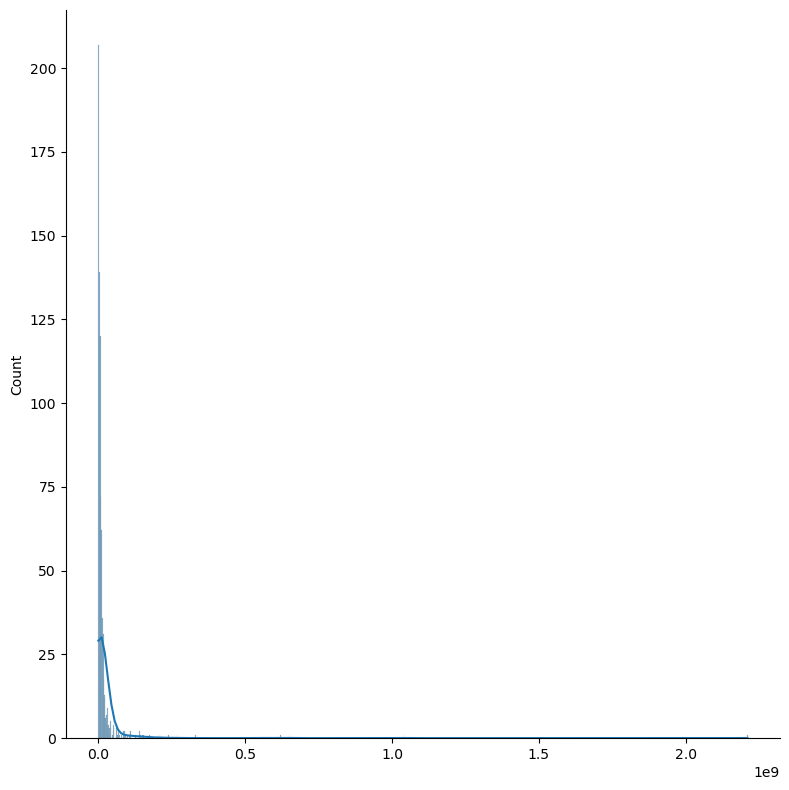

In [35]:
import seaborn as sns
manhattan_dist = pd.DataFrame(data[data['BOROUGH'] == 'Manhattan']['SALE PRICE'])
ax = sns.displot(manhattan_dist,
                 height= 8,
                 legend=False,
                 kde=True)

Berdasarkan plot diatas, maka distribusi probabilitas untuk Sale Price pada wilayah Manhattan adalah disribusi Normal

## Confidence Intervals
Confidence Intervals (CI) adalah jenis estimasti yang dihitung dari data statistik yang diamati. Confidence Interval mengukur seberapa akurat Mean sebuah sample mewakili (mencakup) nilai Mean Populasi sesungguhnya

In [36]:
manhattan_dist.head()

,SALE PRICE
0,6625000.0
3,3936272.0
4,8000000.0
6,3192840.0
9,16232000.0


In [37]:
data.groupby("BOROUGH").agg({"SALE PRICE" : [np.mean, np.std, np.size]})

SALE PRICE                     
                       mean           std   size
BOROUGH                                         
Bronx          5.946771e+05  2.793509e+06   6994
Brooklyn       8.410834e+05  3.951912e+06  23843
Manhattan      1.920741e+07  8.967889e+07    965
Queens         9.107072e+05  3.712604e+06  11053
Staten Island  5.284856e+05  4.762602e+05   5041

Mengambil parameter yang diperlukan hanya untuk wilayah Manhattan dan menghitung standard error serta lower class boundary dan upper class dengan confidence level 95% (z = 1.96)

In [38]:
mean_manhattan = 1.920741
sd = 8.967889
leng = 965
z = 1.96

In [39]:
se = sd / np.sqrt(leng)
se

0.2886865613264464

In [40]:
lcb = mean_manhattan - z * se
ucb = mean_manhattan + z * se
print("The lower class boundary :", lcb)
print("The upper class boundary :", ucb)

The lower class boundary : 1.354915339800165
The upper class boundary : 2.486566660199835


CI of Mean dari Manhattan sale price adalah 1.35 dan 2.48

# Hypothesis Testing
Hypothesis testing dalam statistik adalah cara kita menguji hasil survei atau eksperimen untuk melihat apakah kita memiliki hasil yang bermakna.

Apakah terdapat perbedaan luas lahan bangunan yang di Manhattan dengan Bronx

Hipotesis : 

H0 (Null Hypothesis) : µ1 = µ2

H1 (Alternative Hypothesis) : µ1 ≠ µ2 

In [41]:
df = data[['BOROUGH','LAND SQUARE FEET', 'YEAR BUILT']]
df

,BOROUGH,LAND SQUARE FEET,YEAR BUILT
0,Manhattan,1633.0,1900
3,Manhattan,2272.0,1913
4,Manhattan,2369.0,1900
6,Manhattan,1750.0,1920
9,Manhattan,4489.0,1920
...,...,...,...
84543,Staten Island,2400.0,1998
84544,Staten Island,2498.0,1998
84545,Staten Island,4000.0,1925
84546,Staten Island,208033.0,2001


In [42]:
df_man = df[df["BOROUGH"] == "Manhattan"]
df_bronx = df[df["BOROUGH"] == "Bronx"]

In [43]:
# Menentukan mean dan standar deviasi dari Manhattan
n_man = len(df_man)
mean_man = df_man["LAND SQUARE FEET"].mean()
sd_man = df_man["LAND SQUARE FEET"].std()

# Menentukan mean dan standar deviasi dari Brox
n_bronx = len(df_bronx)
mean_b = df_bronx["LAND SQUARE FEET"].mean()
sd_b = df_bronx["LAND SQUARE FEET"].std()

In [44]:
sm.stats.ztest(df_man['LAND SQUARE FEET'], df_bronx['LAND SQUARE FEET'], alternative='two-sided')

(2.8961030287567753, 0.003778283320615812)

### Conclussion of the hypothesis test
Karena p-value (0.0037) sangat kecil, kita dapat **reject the Null hypothesis** bahwa rata-rata luas bangunan di Manhattan sama dengan Bronx

# Overall Analysis
1. Setelah dilakukan Data Cleaning jumlah data menjadi berkurang, terutama data yang tidak ada terisi Sale Price ,Land Square Feet dan Gross Square Feet maka data itu dihapus serta data lain yang memiliki duplicate. Total pengurangan data yaitu dari 84548 rows menjadi 47896 rows
2. Mean / Rata-rata residential units perbulan pada tahun 2017 adalah 3991 perbulan
3. Distribusi Probabilitas pada wilayah Manhattan adalah Normal
4. CI of Mean dari Manhattan sale price adalah 1.35 dan 2.48
5. Dari hasil pengujian hipotesis dengan tingkat signifikansi 5%, didapatkan bahwa luas Land Square Feet di Manhattan dengan Bronx tidak sama.